## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count=combined_mouse_data["Mouse ID"].value_counts()
mouse_count

g989    13
a897    10
c402    10
i334    10
t565    10
        ..
h428     1
v199     1
f932     1
n482     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice=combined_mouse_data.loc[combined_mouse_data.duplicated(subset=["Mouse ID","Timepoint",]),"Mouse ID"].unique()


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
Dup_data_MID=pd.DataFrame(dup_mice)
Dup_data_MID

,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined_mouse_data[combined_mouse_data["Mouse ID"].isin(dup_mice)==False]

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].value_counts()
clean_mice_count=len(clean_mice)
clean_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

tvol_regimen_mean=clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tvol_regimen_mean

tvol_regimen_median=clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tvol_regimen_median

tvol_regimen_var=clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tvol_regimen_var

tvol_regimen_std=clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tvol_regimen_std

tvol_regimen_sem=clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
tvol_regimen_sem


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats_tbl = pd.DataFrame({"Mean": tvol_regimen_mean, "Median":tvol_regimen_median, "Variance":tvol_regimen_var, "Standard Deviation": tvol_regimen_std, "SEM": tvol_regimen_sem})
summary_stats_tbl

# Using the aggregation method, produce the same summary statistics in a single line


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

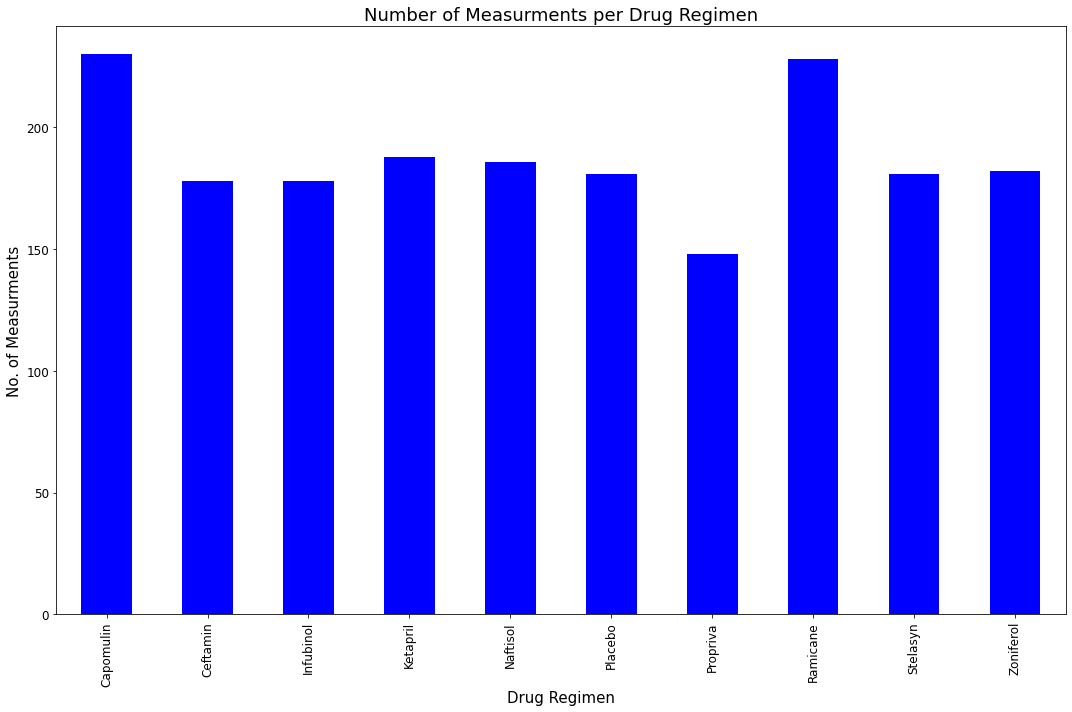

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_msrmt = clean_df.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"] 


plot_pandas = count_msrmt.plot.bar(figsize=(15,10), color='b',fontsize = 12)
count_msrmt

plt.xlabel("Drug Regimen", fontsize=15)
plt.ylabel("No. of Measurments", fontsize=15)
plt.title("Number of Measurments per Drug Regimen", fontsize=18)
plt.tight_layout()
plt.show

count_msrmt


In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
count_msrmt_py = (clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].count()).tolist()
count_msrmt_py


[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

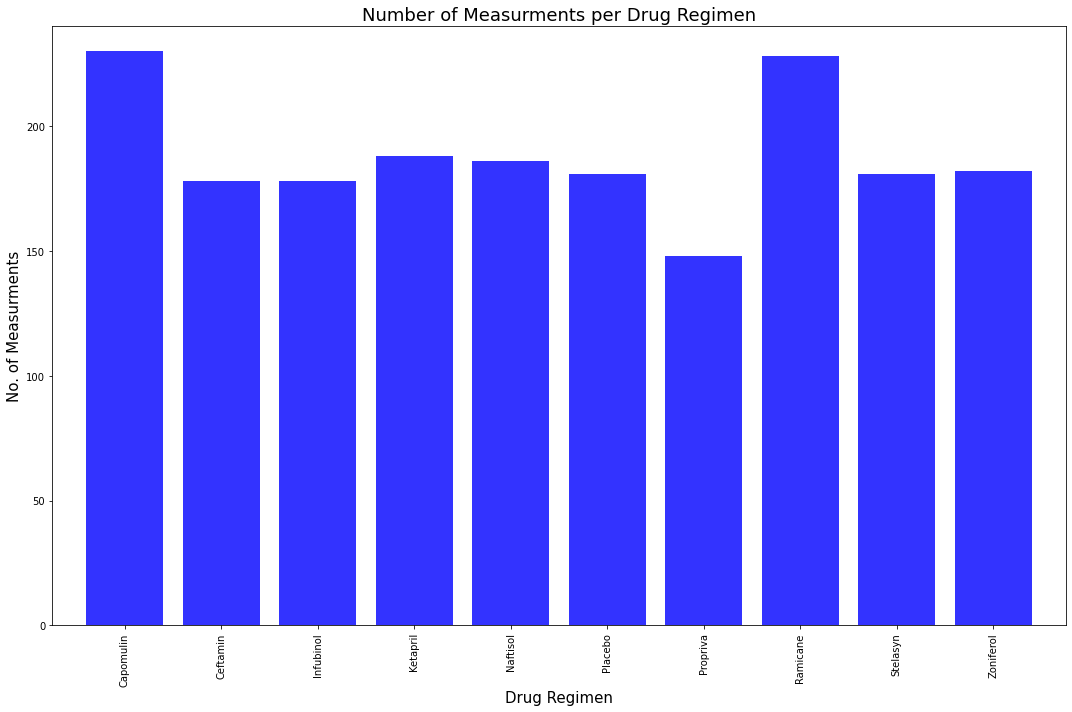

In [11]:
x_axis=np.arange(len(count_msrmt))
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.bar(x_axis, count_msrmt_py, color='b', alpha=0.8, align='center' )

tick_loc=[value for value in x_axis]

plt.xticks(tick_loc, ["Capomulin", "Ceftamin", 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(count_msrmt_py)+10)

plt.xlabel("Drug Regimen", fontsize=15)
plt.ylabel("No. of Measurments", fontsize=15)
plt.title("Number of Measurments per Drug Regimen", fontsize=18)
plt.tight_layout()



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Group mice by gender
gender_group=clean_df.groupby(["Mouse ID","Sex"])
gender_group
gender_df=pd.DataFrame(gender_group.size())

#Create the data frame to summarize gender group count
gender_bymouse=pd.DataFrame(gender_df.groupby(["Sex"]).count())
gender_bymouse.columns = ["Total Count"]

#Calculate the percentage of gender
gender_bymouse["Gender Percentage"] = (100*gender_bymouse["Total Count"]/gender_bymouse["Total Count"].sum())

gender_bymouse["Gender Percentage"]=gender_bymouse["Gender Percentage"]
gender_bymouse



,Total Count,Gender Percentage
Sex,,
Female,123,49.596774
Male,125,50.403226


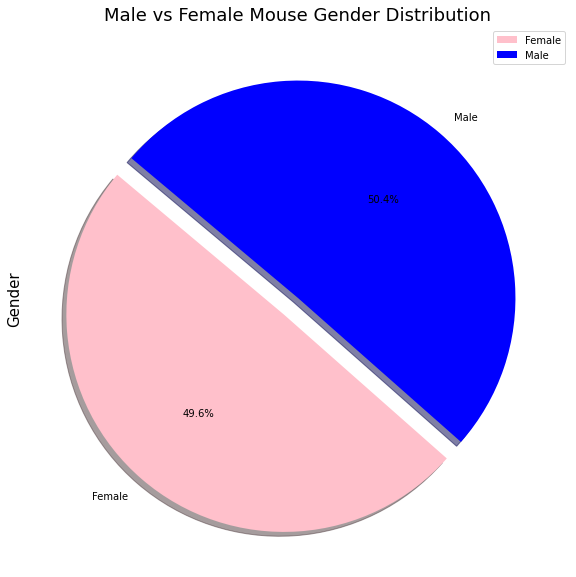

In [13]:
#Generate the Pandas Pie Plot
colors=["pink","blue"]
explode=(0.1,0)
plot = gender_bymouse.plot.pie(y="Total Count", figsize=(15,10),colors=colors,startangle=140, explode = explode, shadow=True, autopct="%1.1f%%")
plt.title('Male vs Female Mouse Gender Distribution',fontsize = 18)
plt.ylabel('Gender',fontsize = 15)

plt.show()


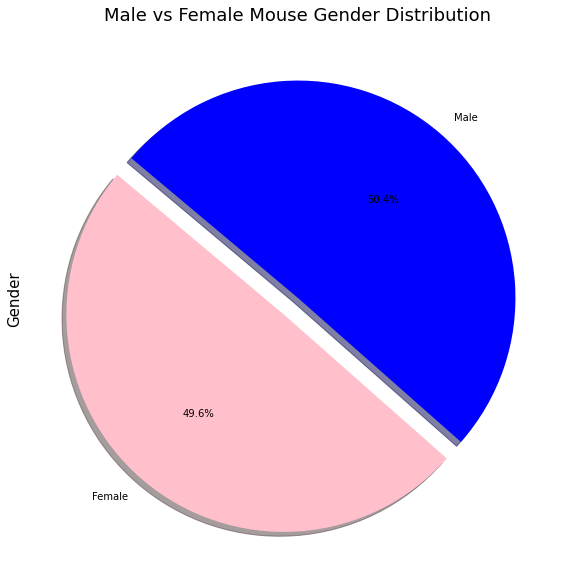

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create category labels
labels = ["Female","Male"]

#List pie chart values for each category
sizes = [49.596774,50.403226]

#Set colors for each category
colors = ["pink", "blue"]

#Determine explode section
explode = (0.1, 0)

#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title('Male vs Female Mouse Gender Distribution',fontsize = 18)
plt.ylabel('Gender',fontsize = 15)

plt.show()



## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse.  Merge this group df with the original 
#dataframe to get the tumor volume at the last timepoint

Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane",:]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol",:]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin",:]
    
#Tumor Volumes
Capomulin_final = Capomulin_df.groupby("Mouse ID").max()["Timepoint"]
Capomulin_vol = pd.DataFrame(Capomulin_final)
Capomulin_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how = "left")
Capomulin_merge.head()

Ramicane_final = Ramicane_df.groupby("Mouse ID").max()["Timepoint"]
Ramicane_vol = pd.DataFrame(Ramicane_final)
Ramicane_merge = pd.merge(Ramicane_vol, clean_df, on=("Mouse ID","Timepoint"),how = "left")
Ramicane_merge.head()

Infubinol_final = Infubinol_df.groupby("Mouse ID").max()["Timepoint"]
Infubinol_vol = pd.DataFrame(Infubinol_final)
Infubinol_merge = pd.merge(Infubinol_vol, clean_df, on=("Mouse ID","Timepoint"),how = "left")
Infubinol_merge.head()

Ceftamin_final = Ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
Ceftamin_vol = pd.DataFrame(Ceftamin_final)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_df, on=("Mouse ID","Timepoint"),how = "left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin" ]

# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

Capomulin_tvol = Capomulin_merge["Tumor Volume (mm3)"]
Cap_quart = Capomulin_tvol.quantile([.25,.5,.75])
Cap_low_q = Cap_quart[0.25]
Cap_up_q = Cap_quart[0.75]
Cap_IQR = Cap_up_q-Cap_low_q

print(f"The lower quartile of Capomulin tumor volume: {Cap_low_q}")
print(f"The upper quartile of Capomulin tumor volume: {Cap_up_q}")
print(f"The IQR of Capomulin tumor volume is: {Cap_IQR}")
print(f"The median of Capomulin tumor volume is: {Cap_quart[0.5]}")

Cap_low_bd = Cap_low_q - (1.5*Cap_IQR)
Cap_up_bd = Cap_up_q + (1.5*Cap_IQR)

print(f"Any values under {Cap_low_bd} could be lower outliers.")
print(f"Any values above {Cap_up_bd} could be upper outliers.")


The lower quartile of Capomulin tumor volume: 32.37735684
The upper quartile of Capomulin tumor volume: 40.1592203
The IQR of Capomulin tumor volume is: 7.781863460000004
The median of Capomulin tumor volume is: 38.125164399999996
Any values under 20.70456164999999 could be lower outliers.
Any values above 51.83201549 could be upper outliers.


In [17]:
Ramicane_tvol = Ramicane_merge["Tumor Volume (mm3)"]
Ram_quart = Ramicane_tvol.quantile([.25,.5,.75])
Ram_low_q = Ram_quart[0.25]
Ram_up_q = Ram_quart[0.75]
Ram_IQR = Ram_up_q-Ram_low_q

print(f"The lower quartile of Ramicane tumor volume: {Ram_low_q}")
print(f"The upper quartile of Ramicane tumor volume: {Ram_up_q}")
print(f"The IQR of Ramicane tumor volume is: {Ram_IQR}")
print(f"The median of Ramicane tumor volume is: {Ram_quart[0.5]}")

Ram_low_bd = Ram_low_q - (1.5*Ram_IQR)
Ram_up_bd = Ram_up_q + (1.5*Ram_IQR)

print(f"Any values under {Ram_low_bd} could be lower outliers.")
print(f"Any values above {Ram_up_bd} could be upper outliers.")

The lower quartile of Ramicane tumor volume: 31.56046955
The upper quartile of Ramicane tumor volume: 40.65900627
The IQR of Ramicane tumor volume is: 9.098536719999998
The median of Ramicane tumor volume is: 36.56165229
Any values under 17.912664470000003 could be lower outliers.
Any values above 54.30681135 could be upper outliers.


In [18]:
Infubinol_tvol = Infubinol_merge["Tumor Volume (mm3)"]
Inf_quart = Infubinol_tvol.quantile([.25,.5,.75])
Inf_low_q = Inf_quart[0.25]
Inf_up_q = Inf_quart[0.75]
Inf_IQR = Inf_up_q-Inf_low_q

print(f"The lower quartile of Infubinol tumor volume: {Inf_low_q}")
print(f"The upper quartile of Infubinol tumor volume: {Inf_up_q}")
print(f"The IQR of Infubinol tumor volume is: {Inf_IQR}")
print(f"The median of Infubinol tumor volume is: {Inf_quart[0.5]}")

Inf_low_bd = Inf_low_q - (1.5*Inf_IQR)
Inf_up_bd = Inf_up_q + (1.5*Inf_IQR)

print(f"Any values under {Inf_low_bd} could be lower outliers.")
print(f"Any values above {Inf_up_bd} could be upper outliers.")

The lower quartile of Infubinol tumor volume: 54.04860769
The upper quartile of Infubinol tumor volume: 65.52574285
The IQR of Infubinol tumor volume is: 11.477135160000003
The median of Infubinol tumor volume is: 60.16518046
Any values under 36.83290494999999 could be lower outliers.
Any values above 82.74144559000001 could be upper outliers.


In [19]:
Ceftamin_tvol = Ceftamin_merge["Tumor Volume (mm3)"]
Cef_quart = Ceftamin_tvol.quantile([.25,.5,.75])
Cef_low_q = Cef_quart[0.25]
Cef_up_q = Cef_quart[0.75]
Cef_IQR = Cef_up_q-Cef_low_q

print(f"The lower quartile of Ceftamin tumor volume: {Cef_low_q}")
print(f"The upper quartile of Ceftamin tumor volume: {Cef_up_q}")
print(f"The IQR of Ceftamin tumor volume is: {Cef_IQR}")
print(f"The median of Ceftamin tumor volume is: {Cef_quart[0.5]}")

Cef_low_bd = Cef_low_q - (1.5*Cef_IQR)
Cef_up_bd = Cef_up_q + (1.5*Cef_IQR)

print(f"Any values under {Cef_low_bd} could be lower outliers.")
print(f"Any values above {Cef_up_bd} could be upper outliers.")

The lower quartile of Ceftamin tumor volume: 48.72207785
The upper quartile of Ceftamin tumor volume: 64.29983003
The IQR of Ceftamin tumor volume is: 15.577752179999997
The median of Ceftamin tumor volume is: 59.85195552
Any values under 25.355449580000002 could be lower outliers.
Any values above 87.66645829999999 could be upper outliers.


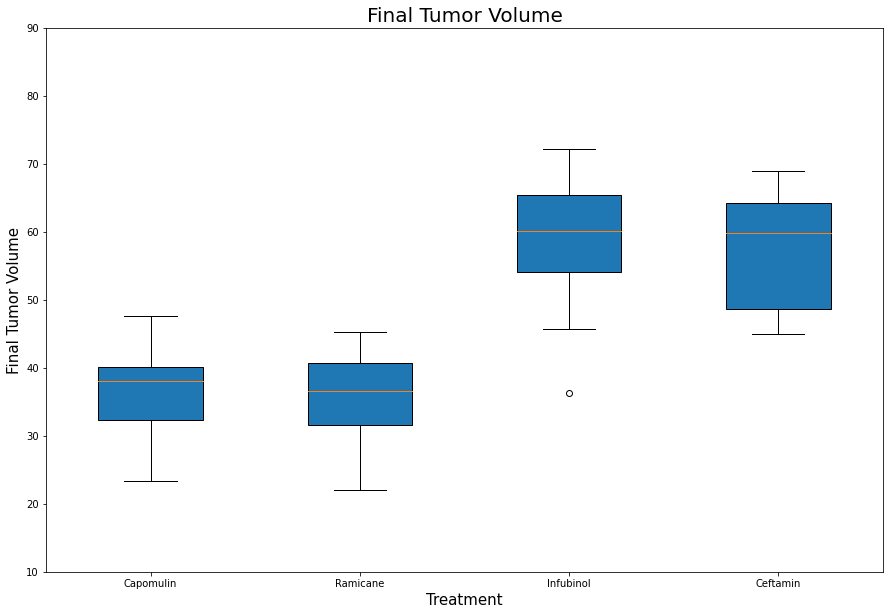

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Plot_Points = [Capomulin_tvol, Ramicane_tvol,Infubinol_tvol, Ceftamin_tvol]
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title("Final Tumor Volume", fontsize=20)
ax1.set_ylabel("Final Tumor Volume", fontsize = 15)
ax1.set_xlabel("Treatment", fontsize = 15)
ax1.boxplot(Plot_Points, labels = treatments_list, widths = 0.5, patch_artist = True, vert = True)
plt.ylim(10, 90)
plt.show()

## Line and Scatter Plots

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
